In [190]:
from data import *

def make_2d_array(x, y):
    arr = np.array([x, y]).T
    # change the dataype to float32
    arr = arr.astype(np.float64)
    return arr

def scale_data(data):
    """
    scale each columns of the 2d array to be between 0 and 1
    """
    data = np.array(data)
    for i in range(data.shape[1]):
        data[:,i] = (data[:,i] - data[:,i].min()) / (data[:,i].max() - data[:,i].min())
    return data

def normalize_data(data):
    """
    normalize each column of the data by standard deviation and mean
    """
    mean_1 , mean_2 = np.mean(data[:,0]), np.mean(data[:,1])
    std_1 , std_2 = np.std(data[:,0]), np.std(data[:,1])
    data[:,0] = (data[:,0] - mean_1)/std_1
    data[:,1] = (data[:,1] - mean_2)/std_2
    return data

def make_swirl_data(N = 2000, angle_start =(-1/2)*np.pi , angle_end =(5/2)*np.pi):
    """generates a helix"""
    
    theta = np.linspace(angle_start,angle_end,N) #np.sqrt(np.random.rand(N))*2*pi # 

    r_a = 2*theta + np.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)

    return x_a


def plot_all(prob_dist):
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows, ncols, figsize=(15, 6))
    for i in range(nrows):
        for j in range(ncols):
            ax[i][j].scatter(prob_dist[i*ncols+j][:,0], prob_dist[i*ncols+j][:,1], s=1)
    
    plt.show()
  
def generate_data():
    p0_data_list, p1_data_list = [], []
    list_1 = np.random.randint(20,35,10)
    list_2 = np.random.randint(1700,2000,10)
    for i in range(10):
        p0_data_list.append(scale_data(make_swirl_data(N=list_2[i])))
        p1_data_list.append(scale_data(make_2d_array(*get_masked_data('S', intensity=list_1[i], rand=True))))

    return p0_data_list, p1_data_list

def create_images(prob_dist ,type):
    for i in range(len(prob_dist)):
        plt.scatter(prob_dist[i][:,0], prob_dist[i][:,1], s=1)
        plt.axis('off')
        plt.savefig(f'{type}_images/{type}_image_{i}.png')
        plt.close()

In [191]:
p0, p1 = generate_data()
create_images(p0, 'p0')
create_images(p1, 'p1')

In [194]:
p0[0]

array([[0.38502521, 0.46963674],
       [0.37587153, 0.4370146 ],
       [0.42393728, 0.40137081],
       ...,
       [0.39531289, 0.97081777],
       [0.39155271, 0.92794784],
       [0.38245708, 0.91665201]])

In [206]:
modified_x, modified_y = p0[0][:,0]+6, p0[0][:,1]
modified_p0 = np.stack((modified_x, modified_y), axis=1)


In [207]:
modified_p0

array([[6.38502521, 0.46963674],
       [6.37587153, 0.4370146 ],
       [6.42393728, 0.40137081],
       ...,
       [6.39531289, 0.97081777],
       [6.39155271, 0.92794784],
       [6.38245708, 0.91665201]])

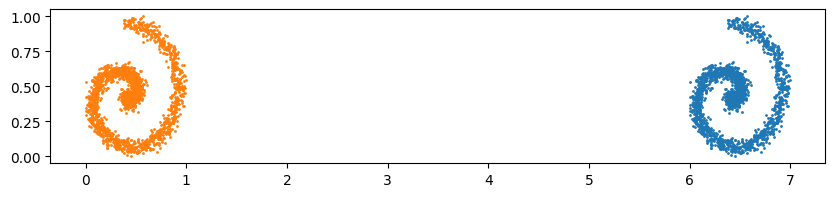

In [209]:
plt.figure(figsize=(10,2))
plt.scatter(modified_p0[:,0], modified_p0[:,1], s=1)
plt.scatter(p0[0][:,0], p0[0][:,1], s=1)
plt.show()